In [11]:
import numpy as np
import math
import sympy as sp
import random
import matplotlib.pyplot as plt

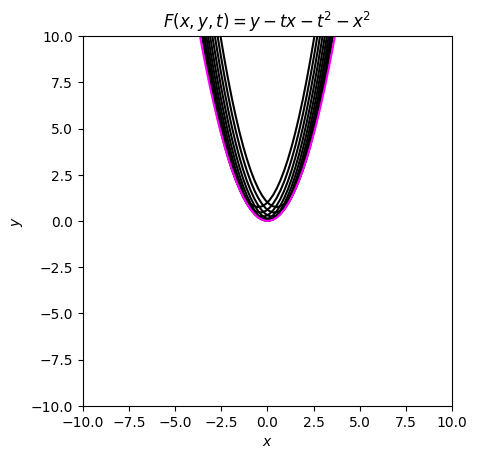

In [12]:
axlim = 10
x = np.linspace(-axlim, axlim, 100)
X, Y = np.meshgrid(x, x)

for t in np.linspace(-1,1,10):
    Fxy = Y - t*X - t**2 - X**2
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy = Y - 3/4 * X**2
plt.contour(X, Y, Exy, levels=[0], colors='magenta')

plt.gca().set_aspect('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$F(x, y, t) = y - tx - t^2 - x^2$')
plt.show()

In [ ]:
family_of_curves = y - 2*x*t - t**2
x_start = 1
y_start = -1
t_min = -1
t_max = 1
h = 0.05
eps = 0.0001
orientation = '+'
print(f"Starting point is ({x_start},{y_start}) and t={t_min}")

axlimx = 2.1
axlimy = 2.1
x_vals = np.linspace(-axlimx, axlimx, 100)
y_vals = np.linspace(-axlimy, axlimy, 100)
X, Y = np.meshgrid(x_vals, y_vals)

for t in np.arange(-1,1,0.1):
    Fxy =  Y - 2*X*t - t**2
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy = Y + X**2
plt.contour(X, Y, Exy, levels=[0], colors='magenta')

# Add labels and title
plt.xlabel('$x$', fontsize='12')
plt.ylabel('$y$', fontsize='12')
plt.gca().set_aspect('equal')
plt.title(r'$F(x, y, t) = y - 2xt - t^2$', fontsize='12')

euler_method(family_of_curves, x_start, y_start, t_min, t_max, h, eps, orientation)
plt.show()

In [13]:
def find_closest_root(roots, t_min, t_max, previous_parameter):
    closest_root = roots[0]
    min_difference = float(10)  # Initialize with a large value

    for root in roots:
        # Calculate the absolute difference
        difference = abs(root - previous_parameter)

        # Check if the root is within the interval and is different from the previous parameter
        if t_min <= root <= t_max and difference > 0: 
            # Check if this root is closer than the previous closest root
            if difference < min_difference:
                min_difference = difference
                closest_root = root
    return closest_root

In [14]:
def choose_root(roots, t_min, t_max, previous_parameter):
    closest_root = roots[0]

    for root in roots:
        difference = abs(root - previous_parameter)
        
        # Check if the root is within the interval and is different from the previous parameter
        if t_min <= root <= t_max and difference > 0: 
                closest_root = root
    return closest_root

In [15]:
def choose_root_randomly(roots):
    if not roots:
        raise ValueError("The 'roots' list is empty, no root to choose from.")
    
    random_root = random.choice(roots)
    return random_root

In [16]:
def euler_method(function, x_start, y_start, t_min, t_max, h):
    list_x = [x_start]
    list_y = [y_start]
    list_parameter = [t_min]
    parameter = t_min
    plt.plot(x_start, y_start, 'r.')
    number_of_iterations = 0
    number_of_points = 0

    while parameter <= t_max:
        number_of_iterations+=1        
        # Calculate the gradient
        gradient_x = sp.diff(function, x).subs({x: x_start, y: y_start, t: parameter})
        gradient_y = sp.diff(function, y).subs({x: x_start, y: y_start, t: parameter})
        #print(f"Gradient at ({round(x_start,2)},{round(y_start,2)}) and t={parameter}: ({gradient_x},{gradient_y})")

        # Compute the new points
        x_new = x_start + h * (-gradient_y)
        y_new = y_start + h * (gradient_x)

        print(f"New point: ({round(x_new,2)}, {round(y_new,2)})")
        list_x.append(x_new)
        list_y.append(y_new)
        
        x_start = x_new
        y_start = y_new
        plt.plot(x_new, y_new, 'b.')

        # Compute a choice of the new parameter
        a = -1
        b = -x_new
        c = -x_new**2 + y_new

        D = b**2 - (4*a*c)
        if (D >= 0):
            sol1 = (-b+math.sqrt(D))/(2*a)
            sol2 = (-b-math.sqrt(D))/(2*a)
            if (t_min > sol1 > t_max and t_min > sol2 > t_max):
                print(f"No root in interval")
            elif (t_min > sol1 > t_max and t_min <= sol2 <= t_max):
                closest_root = sol2
            elif (t_min > sol2 > t_max and t_min <= sol1 <= t_max):
                closest_root = sol1
            else:
                closest_root = choose_root_randomly([sol1, sol2])
                print(f"Algorithm has chosen {closest_root} as a root")
                parameter = closest_root
        else:
            print("No real solution - netrafil si bod z obálky")
            parameter += 0.01
        
        list_parameter.append(parameter)
    print(f"Number of iterations: {number_of_iterations}")


Starting point is (2,3) and t=-1
New point: (1.95, 2.85)
No real solution - netrafil si bod z obálky
New point: (1.90, 2.70)
No real solution - netrafil si bod z obálky
New point: (1.85, 2.56)
No real solution - netrafil si bod z obálky
New point: (1.80, 2.43)
No real solution - netrafil si bod z obálky
New point: (1.75, 2.30)
No real solution - netrafil si bod z obálky
New point: (1.70, 2.17)
Algorithm has chosen -0.850000023560804 as a root
New point: (1.65, 2.04)
No real solution - netrafil si bod z obálky
New point: (1.60, 1.92)
No real solution - netrafil si bod z obálky
New point: (1.55, 1.80)
No real solution - netrafil si bod z obálky
New point: (1.50, 1.68)
No real solution - netrafil si bod z obálky
New point: (1.45, 1.58)
No real solution - netrafil si bod z obálky
New point: (1.40, 1.47)
Algorithm has chosen -0.699915927156968 as a root
New point: (1.35, 1.36)
No real solution - netrafil si bod z obálky
New point: (1.30, 1.26)
No real solution - netrafil si bod z obálky
New

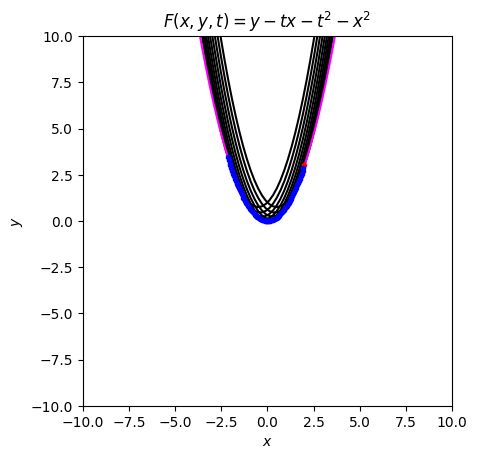

In [18]:
for t in np.linspace(-1,1,10):
    Fxy = Y - t*X - t**2 - X**2
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy = Y - 3/4 * X**2
plt.contour(X, Y, Exy, levels=[0], colors='magenta')

# Starting point
x_start = 2
y_start = 3

t_min = -1
t_max = 1

step = 0.05
print(f"Starting point is ({round(x_start,2)},{round(y_start,2)}) and t={t_min}")

x, y, t = sp.symbols('x y t')
family_of_curves = y - t*x - t**2 - x**2
euler_method(family_of_curves, x_start, y_start, t_min, t_max, step)

plt.gca().set_aspect('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$F(x, y, t) = y - tx - t^2 - x^2$')
plt.show()